<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/Decision_tree_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, auc


In [2]:
#load dataset
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [4]:
#remove duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [5]:
data["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,49


In [6]:
#convert lable to numerical values
data["species"] = data["species"].map({"setosa":0, "versicolor": 1,"virginica":2 })
data["species"] = data["species"].astype("int")# add this code incase you face issues while excuting the model

In [7]:
#Seperate features from label
X = data.drop("species", axis=1)
y = data.species

In [8]:
#dividing train and test sets
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=.3,random_state=42)


#check shape
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((104, 4), (45, 4), (104,), (45,))

In [9]:
#1. call and train the model (ID3 model)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
#check training score
model.score(x_train, y_train)

1.0

In [11]:
#2. predict
y_pred = model.predict(x_test)


result ={"Actual":y_test, "Predicted": y_pred}
pd.DataFrame(result)[:5]

,Actual,Predicted
73,1,1
18,0,0
117,2,2
78,1,1
76,1,1


In [12]:
#3. model score
accuracy_score(y_test, y_pred)

1.0

In [13]:
#check confusion
conf = confusion_matrix(y_test, y_pred)
conf

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



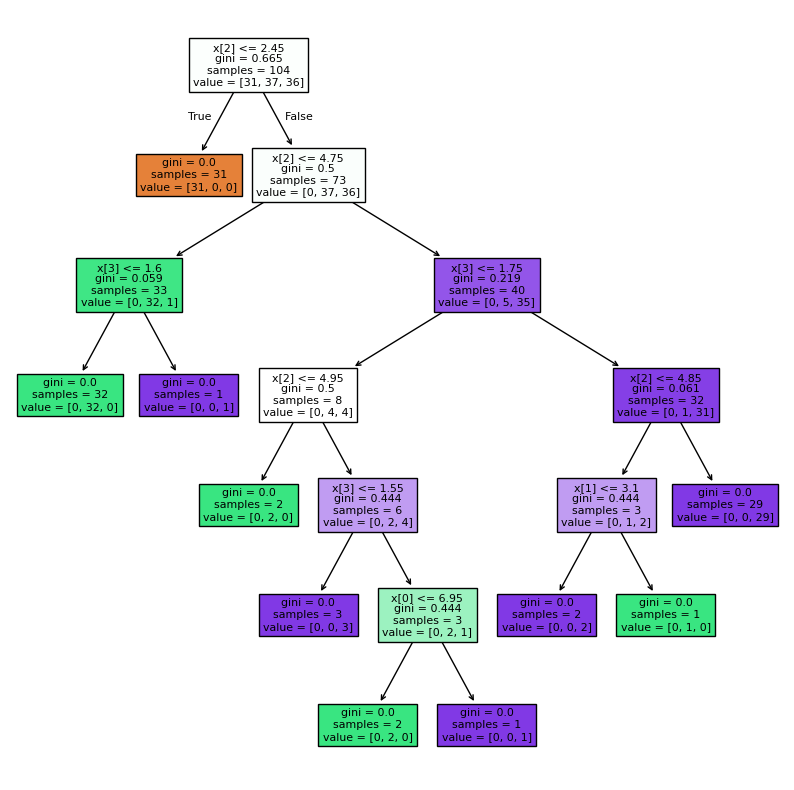

In [15]:
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True);# we can also visualize using plot_tree(model, filled=True) only

## Pruning the model to avoid overffing

In [16]:
#Prune the tree
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(x_train, y_train)


#2. predict
y_pred = model2.predict(x_test)

#3. model score
accuracy_score(y_test, y_pred)

1.0

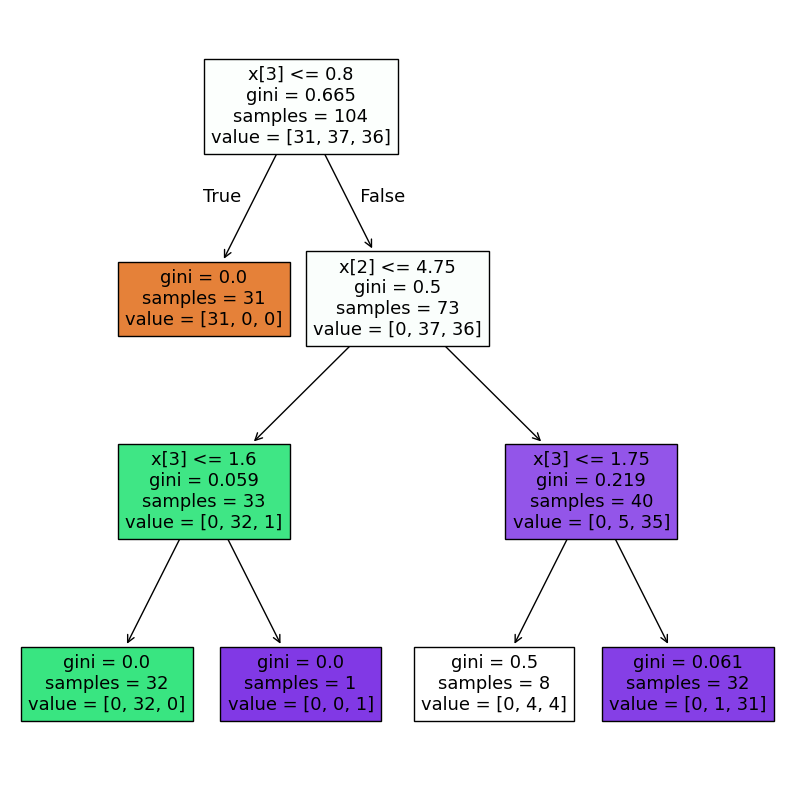

In [17]:
#visualize
plt.figure(figsize=(10,10))
plot_tree(model2, filled=True);

## Create CART model

In [18]:
#CART MODEL
model3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model3.fit(x_train, y_train)


#2. predict
y_pred = model3.predict(x_test)

#3. model score
accuracy_score(y_test, y_pred)

0.9777777777777777

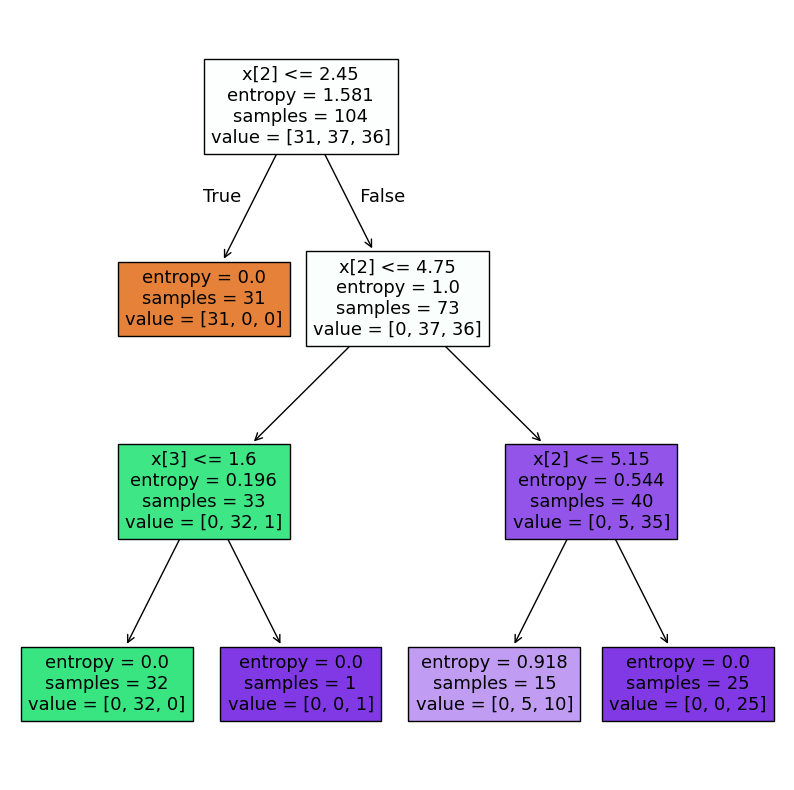

In [19]:
#visualize
plt.figure(figsize=(10,10))
tree.plot_tree(model3, filled=True);

## Get feature Importance

we need to identify the features that we important in helping with the model prediction.

In [20]:
#get features ascore
feature = model3.feature_importances_
feature

array([0.        , 0.        , 0.95707855, 0.04292145])

In [21]:
#Get feautres names
names = model3.feature_names_in_
names

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [22]:
#combine
result ={"name": names, "feature_imp": feature}

fi = pd.DataFrame(result)
fi

,name,feature_imp
0,sepal_length,0.000000
1,sepal_width,0.000000
2,petal_length,0.957079
3,petal_width,0.042921


In [23]:
#sort the features in descending order
t= fi[["name", "feature_imp"]].sort_values(ascending=False, by="feature_imp")
t

,name,feature_imp
2,petal_length,0.957079
3,petal_width,0.042921
1,sepal_width,0.000000
0,sepal_length,0.000000


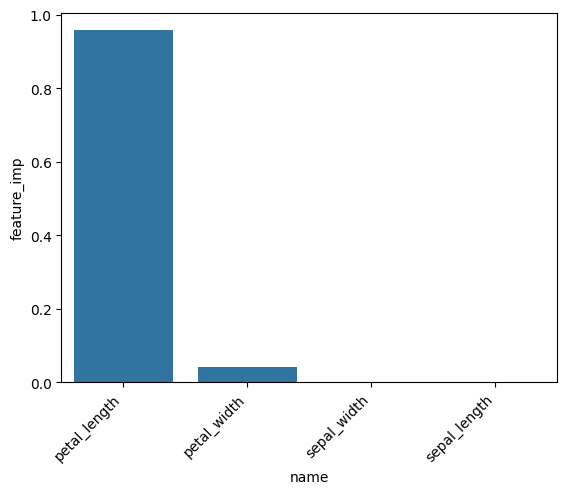

In [24]:
#visualizing feature importance
sns.barplot(x="name", y="feature_imp", data=t)
plt.xticks(rotation=45, ha="right");

''

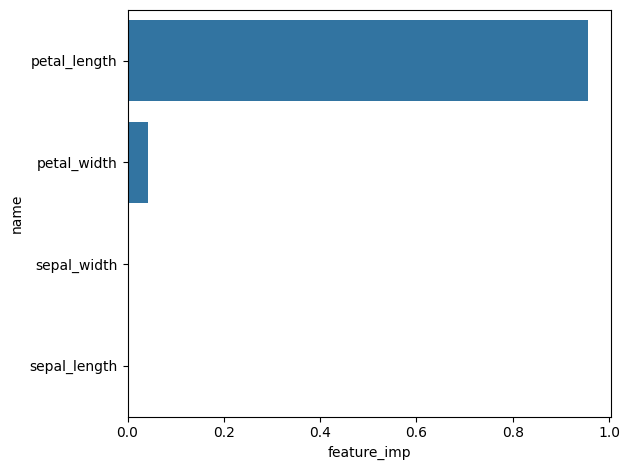

In [25]:
#anaother way of represnyning feature importance
sns.barplot(y="name", x="feature_imp", data=t)
plt.tight_layout()

;


Observasion: Petal length and petal width are the most vital features in predicting the species of the flower.